In [9]:
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from glob import glob
from playsound import playsound
from IPython.display import Audio
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy import signal
import wave
import os
import json

In [10]:
def calc_cepstrum(data):
    """
    Calculates the complex cepstrum of a real sequence.
    """
    spectrum = np.fft.fft(data)
    log_spectrum = np.log(np.abs(spectrum))
    cepstrum = np.fft.ifft(log_spectrum).real
    return cepstrum


def find_fundamental_freq(samples, sr, freq_range):
    cepstrum = calc_cepstrum(samples)
    """
    Finding fundamental frequency of tested sound
    """

    min_freq, max_freq = freq_range
    start = int(sr / max_freq)
    end = int(sr / min_freq)
    narrowed_cepstrum = cepstrum[start:end]
    peak_ix = narrowed_cepstrum.argmax()
    freq0 = sr / (start + peak_ix)

    # print(f'shape of cepstrum {cepstrum.shape}')
    # print(f'min freq: {min_freq}')
    # print(f'max freq: {max_freq}')
    # print(f'start: {start}')
    # print(f'end: {end}')
    # # print(f'narrowed spectrum: {narrowed_cepstrum}')
    # print(f'peak_ix: {peak_ix}')
    # print(f'freq0: {freq0}')

    if freq0 < min_freq or freq0 > max_freq:
        # Ignore the note out of the desired frequency range
        return

    return freq0


In [11]:
audio_files = glob('Audio/piano single notes/*')

audio_names = []

for audio in audio_files:
    audio_names.append(audio[25:])
for count, file in enumerate(audio_names):
    print(f"{count}. {file}")

0. piano A#2.wav
1. piano A#3.wav
2. piano A#4.wav
3. piano A#5.wav
4. piano A#6.wav
5. piano A2.wav
6. piano A3.wav
7. piano A4.wav
8. piano A5.wav
9. piano A6.wav
10. piano C#2.wav
11. piano C#3.wav
12. piano C#4.wav
13. piano C#5.wav
14. piano C#6.wav
15. piano C2.wav
16. piano C3.wav
17. piano C4.wav
18. piano C5.wav
19. piano C6.wav
20. piano C7.wav
21. piano D#2.wav
22. piano D#3.wav
23. piano D#4.wav
24. piano D#5.wav
25. piano D#6.wav
26. piano D2.wav
27. piano D3.wav
28. piano D4.wav
29. piano D5.wav
30. piano D6.wav
31. piano E2.wav
32. piano E3.wav
33. piano E4.wav
34. piano E5.wav
35. piano E6.wav
36. piano F#2.wav
37. piano F#3.wav
38. piano F#4.wav
39. piano F#5.wav
40. piano F#6.wav
41. piano F2.wav
42. piano F3.wav
43. piano F4.wav
44. piano F5.wav
45. piano F6.wav
46. piano G#2.wav
47. piano G#3.wav
48. piano G#4.wav
49. piano G#5.wav
50. piano G#6.wav
51. piano G2.wav
52. piano G3.wav
53. piano G4.wav
54. piano G5.wav
55. piano G6.wav
56. piano H2.wav
57. piano H3.wav

In [12]:
# Audio choosing

audio_path = audio_files[3]
y, sr = librosa.load(audio_path,sr=44100)  # y - raw data of audio file, sr - sample rate of audio file
audio_name = audio_path[6:]
print(f'Row data of audio file: {audio_name}')
print(f'Sample rate (numer of samples in 1s): {sr}')
print(f'Shape of audio data: {y.shape}')

SAMPLE_RATE = 44100
FREQUENCY_RANGE = (80, 4000)

# narrowed_data = y[:sr]
# frequencies = find_fundamental_freq(narrowed_data, sr=SAMPLE_RATE, freq_range=FREQUENCY_RANGE)
# print(f"Znaleziona częstotliwość: {frequencies}")

# Audio(data=y, rate=sr)

Row data of audio file: piano single notes\piano A#5.wav
Sample rate (numer of samples in 1s): 44100
Shape of audio data: (88200,)


In [13]:
o_env = librosa.onset.onset_strength(y=y, sr=sr)
times = librosa.times_like(o_env, sr=sr)
onset_samples = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr, units='samples')
print(onset_samples)

[6144]


Text(0.5, 0, 'Czas [s]')

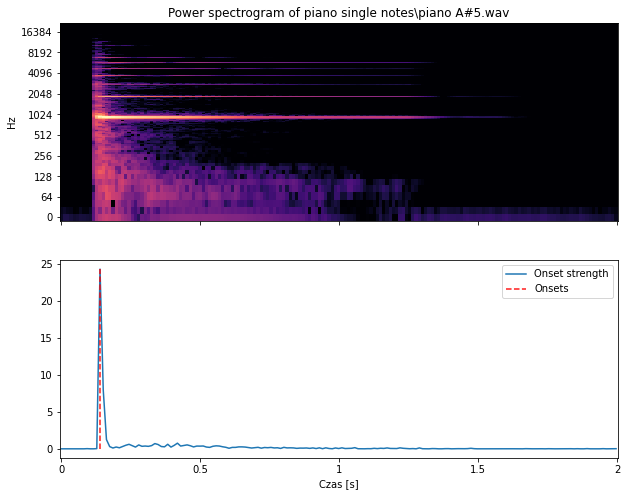

In [14]:
o_env = librosa.onset.onset_strength(y=y, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=o_env, sr=sr)

D = np.abs(librosa.stft(y))
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(10, 8))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         x_axis='time', y_axis='log', ax=ax[0], sr=SAMPLE_RATE)
ax[0].set(title=f'Power spectrogram of {audio_name}')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), color='r', alpha=0.9,
             linestyle='--', label='Onsets')
ax[1].legend()
ax[1].set_xlabel("Czas [s]")

In [15]:
def compute_cepstrum(signal, sample_freq):
    """Computes cepstrum."""
    frame_size = signal.size

    # filtering with hanning window
    windowed_signal = np.hamming(frame_size) * signal
    dt = 1 / sample_freq  # okres trwania jednej próbki
    freq_vector = np.fft.rfftfreq(frame_size, d=dt)  # wektor wartości częstotliwościowych
    X = np.fft.rfft(windowed_signal)  # dyskretna transformata fouriera dla wartości rzeczywistych
    log_X = np.log(np.abs(X))  # skalowanie do wartości logarytmicznych

    df = freq_vector[1] - freq_vector[0]  # różnica między częstotliwościami w wektorze freq_vector
    quefrency_vector = np.fft.rfftfreq(log_X.size, df)  # wektor wartości częstotliwościowych
    cepstrum = np.fft.rfft(log_X)  # obliczenie jeszcze raz transformaty Fouriera co daje cepstrum

    print(f"dt: {dt}")
    print(f"frame_size: {frame_size}")
    print(f"len(freq_vector) = {len(freq_vector)}   ((frame_size/2) +1)\n")
    print(f"df: {df}")
    print(f"log_X.size: {log_X.size}")
    print(f"quefrency_vector = {len(quefrency_vector)}   ((log_X.size/2) +1)\n")

    return quefrency_vector, cepstrum


def cepstrum_f0_detection(signal, sample_freq, fmin=100, fmax=640):
    """Returns f0 based on cepstral processing."""
    quefrency_vector, cepstrum = compute_cepstrum(signal, sample_freq)
    # extract peak in cepstrum in valid region
    valid = (quefrency_vector > 1 / fmax) & (quefrency_vector <= 1 / fmin)  # extracting valid region of cepstrum
    max_quefrency_index = np.argmax(np.abs(cepstrum)[valid])  # quefrency index with max value
    f0 = 1 / quefrency_vector[valid][max_quefrency_index]
    return f0


window_size = 2048

audio_path = audio_files[7]
y, sr = librosa.load(audio_path, sr=44100)
audio_name = audio_path[6:]
fmin, fmax = 80, 640

freq = cepstrum_f0_detection(y, sr, fmin=fmin, fmax=fmax)
print(f"Dźwięk uzyskany ze ścieżki {audio_name}:    {round(freq, 2)} [Hz]")

dt: 2.2675736961451248e-05
frame_size: 88200
len(freq_vector) = 44101   ((frame_size/2) +1)

df: 0.5
log_X.size: 44101
quefrency_vector = 22051   ((log_X.size/2) +1)

Dźwięk uzyskany ze ścieżki piano single notes\piano A4.wav:    450.01 [Hz]


Text(0.5, 1.0, 'Fourier spectrum')

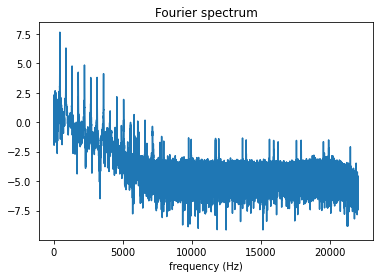

In [16]:
frame_size = y.size
# sound_freq = 261.626
# sound_freq = 523.251

sound_freq = 146.832

windowed_signal = np.hamming(frame_size) * y
dt = 1 / sr
freq_vector = np.fft.rfftfreq(frame_size, d=dt)
X = np.fft.rfft(windowed_signal)
log_X = np.log(np.abs(X))

fig, ax = plt.subplots()
ax.plot(freq_vector, log_X)
ax.set_xlabel('frequency (Hz)')
ax.set_title('Fourier spectrum')

In [17]:
cepstrum = np.fft.rfft(log_X)
df = freq_vector[1] - freq_vector[0]
quefrency_vector = np.fft.rfftfreq(log_X.size, df)

[False False False ... False False False]


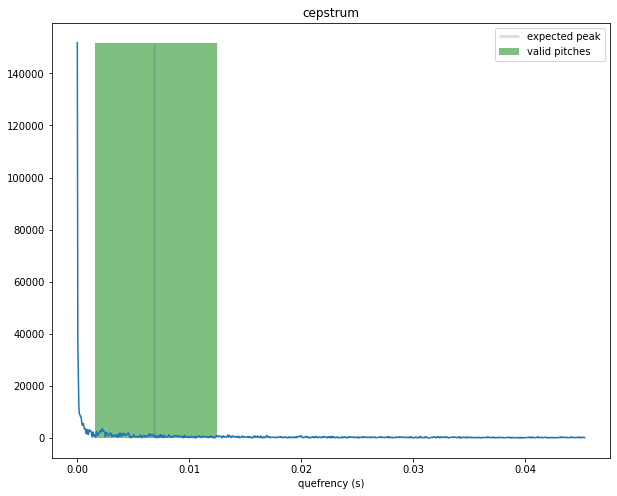

In [18]:
import matplotlib.collections as collections

fig, ax = plt.subplots(figsize=(10, 8))
ax.vlines(1 / sound_freq, 0, np.max(np.abs(cepstrum)), alpha=.2, lw=3, label='expected peak')
ax.plot(quefrency_vector[0:1000], np.abs(cepstrum)[:1000])
valid = (quefrency_vector > 1 / fmax) & (quefrency_vector <= 1 / fmin)
print(valid)
collection = collections.BrokenBarHCollection.span_where(
    quefrency_vector, ymin=0, ymax=np.abs(cepstrum).max(), where=valid, facecolor='green', alpha=0.5,
    label='valid pitches')
ax.add_collection(collection)
ax.set_xlabel('quefrency (s)')
ax.set_title('cepstrum')
ax.legend()